## Deep Learning Course Project 2: CNN

In [17]:
import matplotlib.pyplot as plt

import keras
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import keras.backend as K

import tensorflow as tf

import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
print(keras.__version__)
print(tf.__version__)

2.0.6
1.3.0


### Step 1: Prepare & load dataset

In [6]:
num_examples_per_class = 10000
num_classes = 100

classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe','banana','bandage','barn','baseball bat','baseball',
           'basket','basketball','bathtub','beach','bear','beard','bed','bee','belt','bicycle','binoculars','birthday cake','blueberry',
           'book','boomerang','bottlecap','bowtie','bracelet','brain','bread','broom','bulldozer','bus','bus','butterfly','cactus','cake',
           'calculator','calendar','camel','camera','campfire','candle','cannon','canoe','car','carrot','cello','computer',
           'cat','chandelier','clock','cloud','coffee cup','compass','cookie','couch','cow','crab','crayon','crocodile','crown',
           'cup','diamond','dog','dolphin','donut','dragon','dresser','drill','drums','duck','dumbbell','ear','elbow',
           'elephant','envelope','eraser','eye','eyeglasses','face','fan','feather','fence','finger','fire hydrant',
           'fireplace','firetruck','fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer',
           'foot','fork']

x_data = np.load('./x_data_100_classes_10k.npy')
print(x_data.shape)

(1000000, 784)


### Step 2: Label dataset

In [7]:
labels = [np.full((num_examples_per_class,), classes.index(qdraw)) for qdraw in classes]

## Concat the arrays together
y_data = np.concatenate(labels,axis=0)
print(y_data.shape)

(1000000,)


### Step 3: Show object

In [8]:
def show_object(obj):
    # Reshape 784 array into 28x28 image
    image = obj.reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(image, cmap='gray_r')
    plt.show()

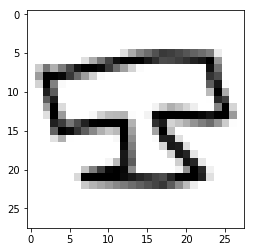

5


In [9]:
show_object(x_data[53000])
print(y_data[53000])

In [10]:
print(x_data.shape)
print(y_data.shape)

(1000000, 784)
(1000000,)


In [11]:
#shuffling function
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [12]:
x_data,y_data = unison_shuffled_copies(x_data,y_data)

In [13]:
y_data[0]

79

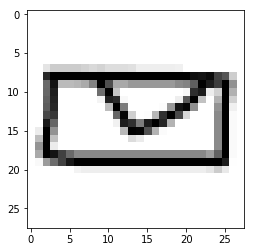

In [14]:
show_object(x_data[0])

In [23]:
epochs = 100
batch_sizes = 1000

imcols = 28
imrows = 28
image_shape = (imrows, imcols, 1)

x_train, x_rest, y_train, y_rest = train_test_split(x_data,y_data,test_size=0.4)
x_validation, x_test, y_validation, y_test = train_test_split(x_rest,y_rest,test_size=0.25)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_validation = x_validation/255.0
x_test = x_test/255.0

x_train = x_train.reshape(x_train.shape[0], imrows, imcols, 1)
x_validation = x_validation.reshape(x_validation.shape[0], imrows, imcols, 1)
x_test = x_test.reshape(x_test.shape[0], imrows, imcols, 1)
y_train = keras.utils.to_categorical(y_train,num_classes)
y_validation = keras.utils.to_categorical(y_validation,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(600000, 28, 28, 1)
(100000, 28, 28, 1)
(600000, 100)
(100000, 100)


In [24]:
model = Sequential()

model.add(Conv2D(20,(5,5),input_shape=(image_shape),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(50,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              820224    
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
__________

In [ ]:
model.fit(x_train,y_train,batch_size = batch_sizes, 
                        epochs = epochs, verbose = 1, 
                        validation_data=(x_validation, y_validation))

score = model.evaluate(
        x_validation,y_validation,
        steps=batch_sizes)
print("\nValidation Accuracy = ", score[1], "Loss = ", score[0])

model.save('model.h5')

Train on 600000 samples, validate on 300000 samples
Epoch 1/100
339000/600000 [===============>..............] - ETA: 328s - loss: 1.9952 - acc: 0.5174

### Let's make some predictions

In [ ]:
result = model.predict(x_pred)
count = 0
correct = 0
for r in result:
    idx = np.argmax(r)
    if idx == y_pred[count]:
        correct = correct + 1
    count = count + 1

print('Test Accuracy:', correct/count*100,'%')